In [15]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter

import numpy.random as npr
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy as sp
import seaborn as sns

import sys
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from scipy import optimize
from scipy import stats

import matplotlib.ticker as mtick
from matplotlib import rc
import copy

today = datetime.today()
month = (date.today() - timedelta(days=30))
yesterday = (date.today() - timedelta(days=1))
%matplotlib inline
idx = pd.date_range('17/06/2021', yesterday)

In [30]:
acquired    = pd.read_csv('../data/dgc-acquired.csv')
issued      = pd.read_csv('../data/dgc-issued.csv')
issued['new_date'] = pd.to_datetime(issued.data, format='%Y-%m-%d')
issued.set_index('new_date', inplace=True)
issued.sort_index(inplace=True)
issued

,data,issued_for_vaccines,issued_for_vaccines_total,issued_for_tests,issued_for_tests_total,issued_for_healing,issued_for_healing_total,issued_all,issued_all_total
new_date,,,,,,,,,
2021-06-17,2021-06-17,74210,74210,0,0,0,0,74210,74210
2021-06-18,2021-06-18,2017424,2091634,342,342,12,12,2017778,2091988
2021-06-19,2021-06-19,3713880,5805514,3143,3485,30,42,3717053,5809041
2021-06-20,2021-06-20,4882739,10688253,1226,4711,20,62,4883985,10693026
2021-06-21,2021-06-21,6127694,16815947,125351,130062,60566,60628,6313611,17006637
...,...,...,...,...,...,...,...,...,...
2022-01-01,2022-01-01,296288,99121924,215931,77839056,16418,2799963,528637,179760943
2022-01-02,2022-01-02,75498,99197422,394621,78233677,14673,2814636,484792,180245735
2022-01-03,2022-01-03,341543,99538965,1219385,79453062,42851,2857487,1603779,181849514


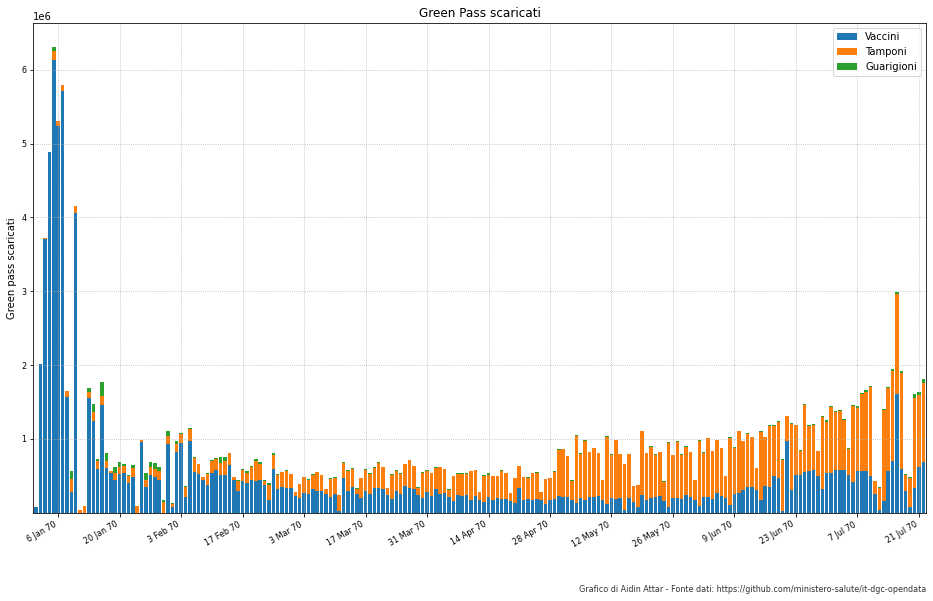

'\nProblemi nella formattazione della data che fa diventare 1970\n'

In [35]:
fig, ax = plt.subplots(figsize=(16,10))
issued[['issued_for_vaccines', 'issued_for_tests', 'issued_for_healing']].plot.bar(ax=ax, width=.8, stacked=True)

ax.xaxis.set_major_formatter(DateFormatter("%-d %b %y"))
ax.xaxis.set_minor_formatter(DateFormatter("%-d %b %Y"))

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')

labels=['Vaccini', 'Tamponi', 'Guarigioni']
ax.legend(labels, loc='upper right')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

'''
Problemi nella formattazione della data che fa diventare 1970
'''

2021-12-07 2022-01-05


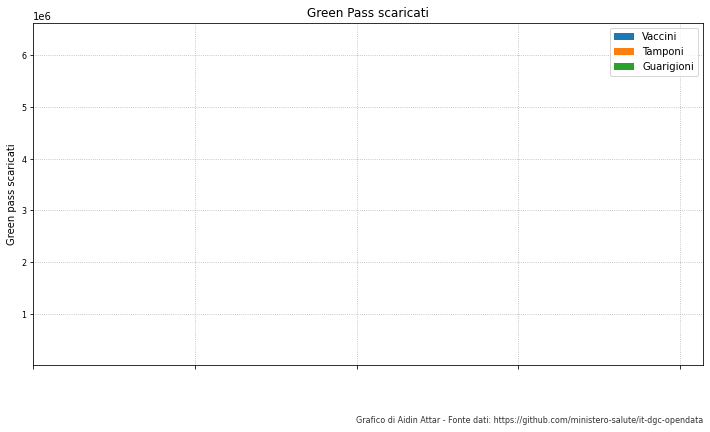

In [34]:
fig, ax = plt.subplots(figsize=(12,7))
issued[['issued_for_vaccines', 'issued_for_tests', 'issued_for_healing']].plot.bar(ax=ax, stacked=True, width=.8)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')

print(month, yesterday)
ax.set_xlim(left=month, right=yesterday)
labels=['Vaccini', 'Tamponi', 'Guarigioni']
ax.legend(labels, loc='upper right')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata', 
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

<AxesSubplot:>

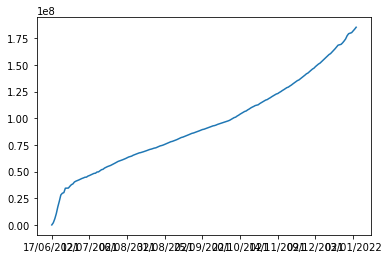

In [29]:
issued['issued_all_total'].plot(x='data')